In [1]:
import casadi
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm

In [2]:
x = casadi.SX.sym("x")
print(x)

x


In [3]:
z = casadi.SX.sym("Z", 4, 2)
print(z)


[[Z_0, Z_4], 
 [Z_1, Z_5], 
 [Z_2, Z_6], 
 [Z_3, Z_7]]


In [4]:
f = casadi.sqrt(x**2 + 10)
print(f)

sqrt((sq(x)+10))


In [5]:
print(casadi.SX(np.array([[1, 2]])))

[[1, 2]]


In [6]:
D_array = np.array([
    [1., 2., 3.],
    [4., 5., 6.]
])
D = casadi.DM(D_array)
D_array2 = D.full()
print(np.array_equal(D_array, D_array2))

True


In [7]:
x = casadi.SX.sym("x", 5)
y = casadi.SX.sym("x", 5)
print(casadi.vertcat(x, y))

[x_0, x_1, x_2, x_3, x_4, x_0, x_1, x_2, x_3, x_4]


In [8]:
x = casadi.SX.sym("x")
y = casadi.SX.sym("y")
nlp = {
    "x" : casadi.vertcat(x, y),
    "f" : x**3 + x**2 + 8*x + 4*y**2 + 3*x*y,
    "g" : x**2 + y**2 - 1}
S = casadi.nlpsol("S", "ipopt", nlp)
print(S)

S:(x0[2],p[],lbx[2],ubx[2],lbg,ubg,lam_x0[2],lam_g0)->(x[2],f,g,lam_x[2],lam_g,lam_p[]) IpoptInterface


In [9]:
r = S(x0=[0, 1], lbg=0, ubg=0)
x_opt = np.array(r["x"])
print("x_opt", x_opt)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality c

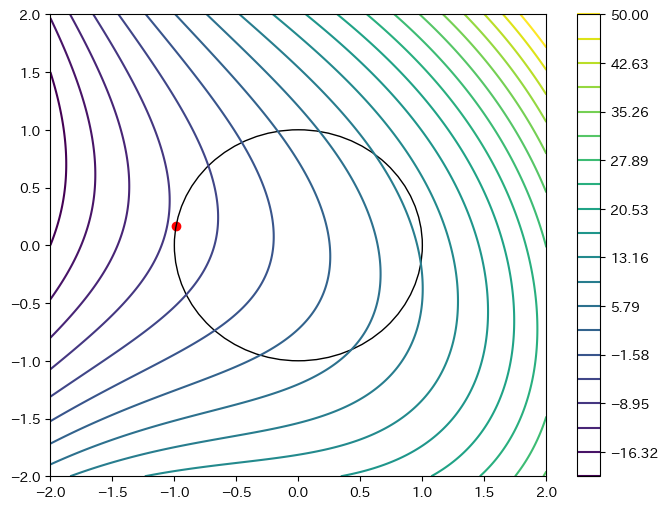

In [10]:
X_, Y_ = np.arange(-2, 2.01, 0.01), np.arange(-2, 2.01, 0.01)
X, Y = np.meshgrid(X_, Y_)
Z = X**3 + X**2 + 8*X + 4*Y**2 + 3*X*Y

levs = np.linspace(-20, 50, 20)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_opt[0], x_opt[1], c="red")
cs = ax.contour(X, Y, Z, levels=levs)
ax.add_patch(plt.Circle(xy=(0,0), radius=1, fill=False))
fig.colorbar(cs)

plt.savefig("images/chap3_NLP_20.png")
plt.show()

In [11]:
a = 10

R = casadi.SX.sym("R")
x_list = [casadi.SX.sym(f"x_{i}") for i in range(5)]
y_list = [casadi.SX.sym(f"y_{i}") for i in range(5)]
r_list = [R, R, R, 2*R, 2*R]

x_nlp = casadi.vertcat(R, *x_list, *y_list)
f_nlp = -R
g_nlp = []

g_nlp.append(R)

for i in range(5):
    g_nlp.append(x_list[i] - r_list[i])
    g_nlp.append(a - x_list[i] - r_list[i])
    g_nlp.append(y_list[i] - r_list[i])
    g_nlp.append(a - y_list[i] - r_list[i])

for j in range(5):
    for i in range(0, j):
        eq = (x_list[i] - x_list[j])**2 + (y_list[i] - y_list[j])**2 - (r_list[i] + r_list[j])**2
        g_nlp.append(eq)

g_nlp = casadi.vertcat(*g_nlp)

nlp = {"x" : x_nlp, "f" : f_nlp, "g" : g_nlp}

S = casadi.nlpsol("S", "ipopt", nlp)
print(S)

S:(x0[11],p[],lbx[11],ubx[11],lbg[31],ubg[31],lam_x0[11],lam_g0[31])->(x[11],f,g[31],lam_x[11],lam_g[31],lam_p[]) IpoptInterface


In [12]:
r = S(x0=[1, 1, 3, 8, 7, 3, 1, 2, 8, 3, 7], lbg=[0] * 31, ubg=[np.inf] * 31)
x_opt = np.array(r["x"]).ravel()
print("x_opt: ", x_opt)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       91
Number of nonzeros in Lagrangian Hessian.............:       31

Total number of variables............................:       11
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       31
        inequality constraints with only lower bounds:       31
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e+00 0.00e+00 1.56e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

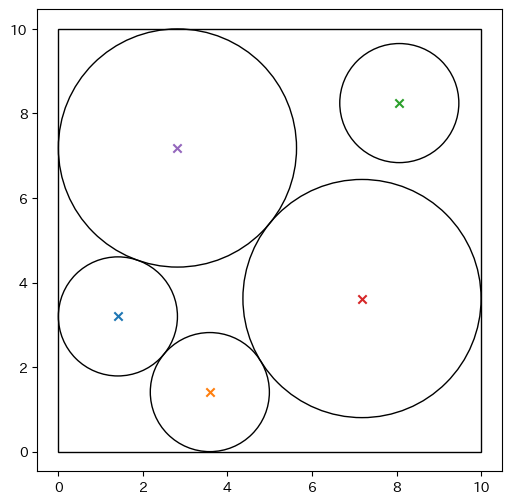

In [13]:
R_opt = x_opt[0]
coord_opt = x_opt[1:].reshape(2, 5).T

flg, ax = plt.subplots(figsize=(6, 6))

for i in range(5):
    radius = R_opt if i <= 2 else 2*R_opt
    circle = patches.Circle(xy=coord_opt[i], radius=radius, fill=False)

    ax.add_patch(circle)
    ax.scatter(*coord_opt[i], marker="x")

rect = patches.Rectangle([0, 0], 10, 10, fill=False)
ax.add_patch(rect)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis("equal")

plt.savefig("images/chap3_NLP_packing_1.png")
plt.show()

In [14]:
r = S(x0=[1, 1, 3, 8, 7, 3, 1, 3, 8, 3, 7], lbg=[0]*31, ubg=[np.inf]*31)
x_opt = np.array(r["x"]).ravel()
print("x_opt: ", x_opt)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       91
Number of nonzeros in Lagrangian Hessian.............:       31

Total number of variables............................:       11
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       31
        inequality constraints with only lower bounds:       31
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000000e+00 0.00e+00 1.52e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

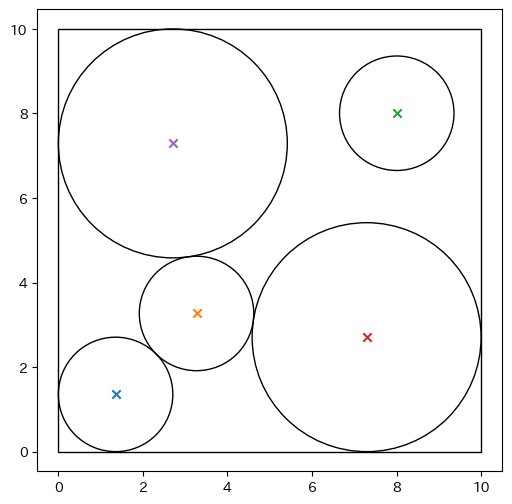

In [15]:
R_opt = x_opt[0]
coord_opt = x_opt[1:].reshape(2, 5).T

flg, ax = plt.subplots(figsize=(6, 6))

for i in range(5):
    radius = R_opt if i <= 2 else 2*R_opt
    circle = patches.Circle(xy=coord_opt[i], radius=radius, fill=False)

    ax.add_patch(circle)
    ax.scatter(*coord_opt[i], marker="x")

rect = patches.Rectangle([0, 0], 10, 10, fill=False)
ax.add_patch(rect)

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis("equal")

plt.savefig("images/chap3_NLP_packing_2.png")
plt.show()

In [16]:
x = casadi.SX.sym("x")
y = casadi.SX.sym("y")
qp = {
    "x": casadi.vertcat(x, y),
    "f": x**2 + 2*y**2 - x - 2*y,
    "g": casadi.vertcat(
        x + y - 3,
        x - 1,
        3 - y,
        -x + 3 * y + 1,
        5 - x - y)
}
S = casadi.qpsol("S", "osqp", qp)
print(S)

S:(x0[2],p[],lbx[2],ubx[2],lbg[5],ubg[5],lam_x0[2],lam_g0[5])->(x[2],f,g[5],lam_x[2],lam_g[5],lam_p[]) MXFunction


In [17]:
r = S(x0=[0, 1], lbg=[0, 0, 0, 0, 0], ubg=[0, np.inf, np.inf, np.inf, np.inf])
x_opt = np.array(r["x"])
print("x_opt: ", x_opt)

x_opt:  [[1.83318971]
 [1.16662521]]


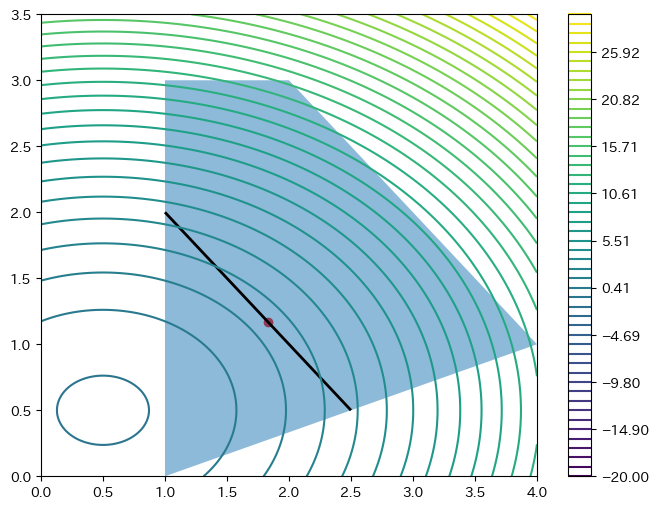

In [18]:
X_, Y_ = np.arange(0, 4.01, 0.01), np.arange(0, 3.51, 0.01)
X, Y = np.meshgrid(X_, Y_)
Z = X**2 + 2*Y**2 + - X - 2*Y

levs = np.linspace(-20, 30, 50)

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x_opt[0], x_opt[1], c="red")
cs = ax.contour(X, Y, Z, levels=levs)
fig.colorbar(cs)

points = [[1, 0], [1, 2], [1, 3], [2, 3], [4, 1], [5/2, 1/2]]
polygon = patches.Polygon(xy=points, closed=True, alpha=0.5)
ax.add_patch(polygon)

polyline = patches.Polygon([[1, 2], [5/2, 1/2]], closed=False, edgecolor="black", facecolor="none", linewidth=2)

ax.add_patch(polyline)

plt.savefig("images/chap3_QP_2D.png")
plt.show()

In [19]:
x = casadi.SX.sym("x")
S = casadi.nlpsol("S", "ipopt", {"x": x, "f": x})
S.print_options()

"Option name" [type] = value
> "error_on_fail"          [OT_BOOL]      "Throw exceptions when function evaluation fails (default true)."
> "print_time"          [OT_BOOL]      "print information about execution time. Implies record_time."
> "record_time"          [OT_BOOL]      "record information about execution time, for retrieval with stats()."
> "regularity_check"          [OT_BOOL]      "Throw exceptions when NaN or Inf appears during evaluation"
> "verbose"          [OT_BOOL]      "Verbose evaluation -- for debugging"
> "ad_weight"          [OT_DOUBLE]      "Weighting factor for derivative calculation.When there is an option of either using forward or reverse mode directional derivatives, the condition ad_weight*nf<=(1-ad_weight)*na is used where nf and na are estimates of the number of forward/reverse mode directional derivatives needed. By default, ad_weight is calculated automatically, but this can be overridden by setting this option. In particular, 0 means forcing forward mo

In [20]:
D = casadi.diag([1, 2, 3])
print(D)


[[1, 00, 00], 
 [00, 2, 00], 
 [00, 00, 3]]


In [21]:
D = casadi.diag([2, 3, 4, 5])
M = casadi.SX(D)
print(M)


[[2, 00, 00, 00], 
 [00, 3, 00, 00], 
 [00, 00, 4, 00], 
 [00, 00, 00, 5]]


In [22]:
print(M[:2, :3])


[[2, 00, 00], 
 [00, 3, 00]]


In [23]:
M[0, :] = 2
M[3, 0] = casadi.SX.sym("x")
print(M)

@1=2, 
[[@1, @1, @1, @1], 
 [00, 3, 00, 00], 
 [00, 00, 4, 00], 
 [x, 00, 00, 5]]


In [24]:
x = casadi.SX.sym("x")
y = casadi.SX.sym("y", 2, 2)
print(casadi.sin(y) - x)


[[(sin(y_0)-x), (sin(y_2)-x)], 
 [(sin(y_1)-x), (sin(y_3)-x)]]


In [25]:
print(y*y)
print(y@y)


[[sq(y_0), sq(y_2)], 
 [sq(y_1), sq(y_3)]]

[[(sq(y_0)+(y_2*y_1)), ((y_0*y_2)+(y_2*y_3))], 
 [((y_1*y_0)+(y_3*y_1)), ((y_1*y_2)+sq(y_3))]]


In [26]:
print(y)
print(y.T)


[[y_0, y_2], 
 [y_1, y_3]]

[[y_0, y_1], 
 [y_2, y_3]]


In [27]:
x = casadi.SX.eye(4)
print(x.reshape((2, 8)))

@1=1, 
[[@1, 00, 00, 00, 00, @1, 00, 00], 
 [00, 00, @1, 00, 00, 00, 00, @1]]


In [28]:
x = casadi.SX.sym("x", 1)
df = casadi.jacobian(x**2, x)
print(df)
print(casadi.simplify(df))

(x+x)
(2*x)


In [29]:
A = casadi.SX.sym("A", 3, 2)
x = casadi.SX.sym("x", 2)
print(A)
print(casadi.jacobian(A@x, x))


[[A_0, A_3], 
 [A_1, A_4], 
 [A_2, A_5]]

[[A_0, A_3], 
 [A_1, A_4], 
 [A_2, A_5]]


In [30]:
[H, g] = casadi.hessian(casadi.dot(x, x), x)
print("H: ", H)

H:  @1=2, 
[[@1, 00], 
 [00, @1]]


In [31]:
x = casadi.SX.sym("x")
y = casadi.SX.sym("y")
f1 = x
f2 = casadi.sin(y) * x
f = casadi.Function("f", [x,y], [f1, f2], ["x", "y"], ["f1", "f2"])
print(f)

f:(x,y)->(f1,f2) SXFunction


In [32]:
print(f(x=1.1, y=2.1))

{'f1': DM(1.1), 'f2': DM(0.94953)}


In [33]:
x = casadi.SX.sym("x")
y = casadi.SX.sym("y")
f = casadi.Function("f", [x, y], [2*x + y], ["x", "y"], ["2x"])
print(f)

f:(x,y)->(2x) SXFunction


In [34]:
print(f())
print(f(x=casadi.DM([1])))
print(f(x=casadi.DM([1, 2, 3, 4])))
print(f(x=casadi.DM([1, 2, 3, 4]), y=1))

{'2x': DM(0)}
{'2x': DM(2)}
{'2x': DM([2, 4, 6, 8])}
{'2x': DM([3, 5, 7, 9])}


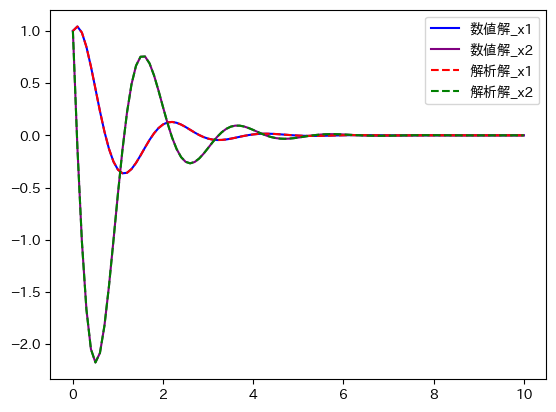

In [35]:
dt = 0.1
t_eval = np.arange(0, 10+dt, dt)
X = [casadi.DM([1, 1])]

A = casadi.DM([
    [0, 1],
    [-10, -2]
])
x = casadi.SX.sym("x", 2)

ode = A@x
dae = {"x": x, "ode": ode}

F = casadi.integrator("F", "idas", dae, 0, dt)

for t in t_eval[:-1]:
    res = F(x0=X[-1])
    X.append(res["xf"])

X = np.array(X).reshape(-1, 2)

X_true_1 = casadi.exp(-t_eval) * casadi.cos(3 * t_eval) + 2/3 * casadi.exp(-t_eval) * casadi.sin(3*t_eval)
X_true_2 = casadi.exp(-t_eval) * casadi.cos(3 * t_eval) - 11/3 * casadi.exp(-t_eval) * casadi.sin(3*t_eval)

plt.plot(t_eval, X[:, 0], label="数値解_x1", color="blue")
plt.plot(t_eval, X[:, 1], label="数値解_x2", color="purple")
plt.plot(t_eval, X_true_1, label="解析解_x1", color="red", linestyle="--")
plt.plot(t_eval, X_true_2, label="解析解_x2", color="green", linestyle="--")

plt.legend()
plt.savefig("images/chap3_integ.png")
plt.show()